In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython.display import display
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler


#### Problem Statement

Flight delays not only irritate air passengers and disrupt their schedules but also cause 

- A decrease in efficiency 
- An increase in capital costs, 
- Reallocation of flight crews and aircraft
- Additional crew expenses 

As a result, on an aggregate basis, an airline's record of flight delays may have a negative impact on passenger demand.
You are tasked to build a flight delay predictive model using Machine Learning techniques. The accurate prediction of flight delays will help all air travel players set up effective action plans to reduce the impact of the delays and avoid loss of time, capital and resources.


Variable definitions

<ul>
<li> DATOP - Date of flight </li>
<li> FLTID - Flight number </li>
<li> DEPSTN - Departure point </li> 
<li> ARRSTN - Arrival point </li> 
<li> STD - Scheduled Time departure </li> 
<li> STA - Scheduled Time arrival </li> 
<li> STATUS - Flight status </li> 
<li> AC - Aircraft Code </li>
</ul>

In [2]:
df = pd.read_csv("Train - Train.csv")

display(df.head(5))


,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12.55.00,ATA,TU 32AIMN,260
1,train_id_1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16.55.00,ATA,TU 31BIMO,20
2,train_id_2,2016-01-16,TU 0214,TUN,IST,2016-01-16 4:10:00,2016-01-16 06.45.00,ATA,TU 32AIMN,0
3,train_id_3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17.00.00,ATA,TU 736IOK,0
4,train_id_4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15.50.00,ATA,TU 320IMU,22


In [3]:
print(f"The shape of the dataframe is: {df.shape}")


The shape of the dataframe is: (107833, 10)


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107833 entries, 0 to 107832
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   ID      107833 non-null  object
 1   DATOP   107833 non-null  object
 2   FLTID   107833 non-null  object
 3   DEPSTN  107833 non-null  object
 4   ARRSTN  107833 non-null  object
 5   STD     107833 non-null  object
 6   STA     107833 non-null  object
 7   STATUS  107833 non-null  object
 8   AC      107833 non-null  object
 9   target  107833 non-null  int64 
dtypes: int64(1), object(9)
memory usage: 8.2+ MB


### First Observation:




In [5]:
num_col = [col for col in df.columns if df[col].dtypes != "O"]
cat_col = [col for col in df.columns if col not in num_col]


In [6]:
num_df = df[num_col]
cat_df = df[cat_col]


In [7]:
cat_df


,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12.55.00,ATA,TU 32AIMN
1,train_id_1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16.55.00,ATA,TU 31BIMO
2,train_id_2,2016-01-16,TU 0214,TUN,IST,2016-01-16 4:10:00,2016-01-16 06.45.00,ATA,TU 32AIMN
3,train_id_3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17.00.00,ATA,TU 736IOK
4,train_id_4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15.50.00,ATA,TU 320IMU
...,...,...,...,...,...,...,...,...,...
107828,train_id_107828,2018-07-05,WKL 0000,TUN,TUN,2018-07-05 23:00:00,2018-07-06 02.00.00,SCH,TU 32AIML
107829,train_id_107829,2018-01-13,UG 0003,DJE,TUN,2018-01-13 8:00:00,2018-01-13 09.00.00,SCH,UG AT7AT7
107830,train_id_107830,2018-11-07,SGT 0000,TUN,TUN,2018-11-07 5:00:00,2018-11-07 12.50.00,SCH,TU 736IOK
107831,train_id_107831,2018-01-23,UG 0010,TUN,DJE,2018-01-23 18:00:00,2018-01-23 18.45.00,ATA,TU CR9ISA


Drop ID columns since it has too many unique values and probably add no additional information

In [8]:
cat_df.drop("ID", axis=1, inplace=True)


C:\Users\HP\AppData\Local\Temp\ipykernel_10084\1514270230.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df.drop("ID", axis=1, inplace=True)


In [9]:
cat_df.head()


,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC
0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12.55.00,ATA,TU 32AIMN
1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16.55.00,ATA,TU 31BIMO
2,2016-01-16,TU 0214,TUN,IST,2016-01-16 4:10:00,2016-01-16 06.45.00,ATA,TU 32AIMN
3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17.00.00,ATA,TU 736IOK
4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15.50.00,ATA,TU 320IMU


In [10]:
observe_data = pd.DataFrame(columns=["Variable", "NaN", "Unique", "Nunique", "dtype"])

for i, col in enumerate(cat_df.columns):
    observe_data.loc[i] = [col, cat_df[col].isna().sum(), cat_df[col].unique(), cat_df[col].nunique(), cat_df[col].dtype]
    feats_df = observe_data
feats_df


,Variable,NaN,Unique,Nunique,dtype
0,DATOP,0,"[2016-01-03, 2016-01-13, 2016-01-16, 2016-01-1...",1011,object
1,FLTID,0,"[TU 0712, TU 0757, TU 0214, TU 0480, TU 0338, ...",1861,object
2,DEPSTN,0,"[CMN, MXP, TUN, DJE, TLS, IST, ORY, MIR, BRU, ...",132,object
3,ARRSTN,0,"[TUN, IST, NTE, ALG, BCN, ORY, FCO, NCE, MRS, ...",128,object
4,STD,0,"[2016-01-03 10:30:00, 2016-01-13 15:05:00, 201...",81697,object
5,STA,0,"[2016-01-03 12.55.00, 2016-01-13 16.55.00, 201...",85136,object
6,STATUS,0,"[ATA, DEP, RTR, SCH, DEL]",5,object
7,AC,0,"[TU 32AIMN, TU 31BIMO, TU 736IOK, TU 320IMU, T...",68,object


### Okay now, that we know our data a little bit, let's dig in a bit 


In [11]:
print(f"The number of duplicate columns are: {df.duplicated().sum()}")


The number of duplicate columns are: 0


In [12]:
# Before dropping duplicate values

cat_df.shape


(107833, 8)

In [13]:
df.drop_duplicates(inplace=True)

cat_df.shape


(107833, 8)

In [14]:
cat_df.describe(include="O").T


,count,unique,top,freq
DATOP,107833,1011,2018-08-31,183
FLTID,107833,1861,WKL 0000,3105
DEPSTN,107833,132,TUN,42522
ARRSTN,107833,128,TUN,42572
STD,107833,81697,2017-06-23 6:00:00,8
STA,107833,85136,2016-01-19 01.00.00,6
STATUS,107833,5,ATA,93679
AC,107833,68,TU 320IMU,4724


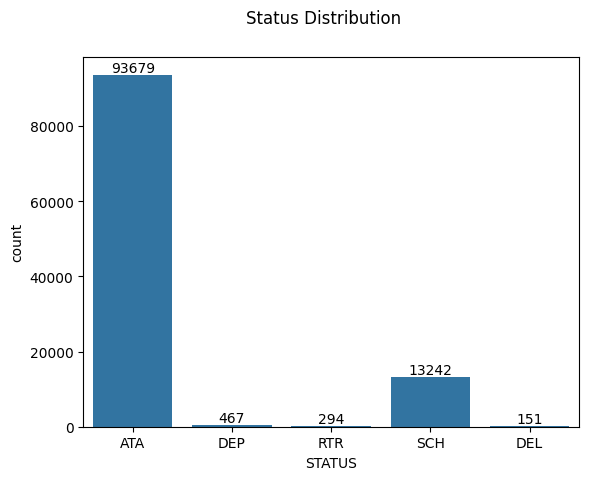

In [15]:
ax = sns.countplot(data=cat_df, x="STATUS")

for p in ax.patches:
    x = p.get_x() + p.get_width() / 2.0
    y = int(p.get_height())

    ax.annotate(text=str(y), xy=(x,y),ha="center", xytext=(0,5), va="center", textcoords="offset points" )
plt.suptitle("Status Distribution")
plt.show()


# OBSERVATION OF THE ABOVE VISUALIZATION

<ul>
    <li>ATA- Actual Time Of Arrival of passengers </li>
    <li>DEP- The Time Of Departure is lower than SCH-Scheduled </li>
    <li>RTR- Return which less common still occured more often than DEL- Delayed</li>
</ul>

## FEATURE ENGINEERING

In [16]:
cat_df = pd.get_dummies(data=cat_df, columns =["STATUS"], dtype=float)


In [17]:
cat_df


,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,AC,STATUS_ATA,STATUS_DEL,STATUS_DEP,STATUS_RTR,STATUS_SCH
0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12.55.00,TU 32AIMN,1.0,0.0,0.0,0.0,0.0
1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16.55.00,TU 31BIMO,1.0,0.0,0.0,0.0,0.0
2,2016-01-16,TU 0214,TUN,IST,2016-01-16 4:10:00,2016-01-16 06.45.00,TU 32AIMN,1.0,0.0,0.0,0.0,0.0
3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17.00.00,TU 736IOK,1.0,0.0,0.0,0.0,0.0
4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15.50.00,TU 320IMU,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
107828,2018-07-05,WKL 0000,TUN,TUN,2018-07-05 23:00:00,2018-07-06 02.00.00,TU 32AIML,0.0,0.0,0.0,0.0,1.0
107829,2018-01-13,UG 0003,DJE,TUN,2018-01-13 8:00:00,2018-01-13 09.00.00,UG AT7AT7,0.0,0.0,0.0,0.0,1.0
107830,2018-11-07,SGT 0000,TUN,TUN,2018-11-07 5:00:00,2018-11-07 12.50.00,TU 736IOK,0.0,0.0,0.0,0.0,1.0
107831,2018-01-23,UG 0010,TUN,DJE,2018-01-23 18:00:00,2018-01-23 18.45.00,TU CR9ISA,1.0,0.0,0.0,0.0,0.0


In [18]:
cat_df["Date_Of_Flight_Year"] = cat_df["DATOP"].str.split("-").str[0].astype(int)


In [19]:
cat_df["Date_Of_Flight_Month"] = cat_df["DATOP"].str.split("-").str[1].astype(int)
cat_df["Date_Of_Flight_Day"] = cat_df["DATOP"].str.split("-").str[2].astype(int)


In [20]:
type(cat_df)


pandas.core.frame.DataFrame

In [21]:
cat_df = cat_df.drop("DATOP", axis=1)
cat_df


,FLTID,DEPSTN,ARRSTN,STD,STA,AC,STATUS_ATA,STATUS_DEL,STATUS_DEP,STATUS_RTR,STATUS_SCH,Date_Of_Flight_Year,Date_Of_Flight_Month,Date_Of_Flight_Day
0,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12.55.00,TU 32AIMN,1.0,0.0,0.0,0.0,0.0,2016,1,3
1,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16.55.00,TU 31BIMO,1.0,0.0,0.0,0.0,0.0,2016,1,13
2,TU 0214,TUN,IST,2016-01-16 4:10:00,2016-01-16 06.45.00,TU 32AIMN,1.0,0.0,0.0,0.0,0.0,2016,1,16
3,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17.00.00,TU 736IOK,1.0,0.0,0.0,0.0,0.0,2016,1,17
4,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15.50.00,TU 320IMU,1.0,0.0,0.0,0.0,0.0,2016,1,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107828,WKL 0000,TUN,TUN,2018-07-05 23:00:00,2018-07-06 02.00.00,TU 32AIML,0.0,0.0,0.0,0.0,1.0,2018,7,5
107829,UG 0003,DJE,TUN,2018-01-13 8:00:00,2018-01-13 09.00.00,UG AT7AT7,0.0,0.0,0.0,0.0,1.0,2018,1,13
107830,SGT 0000,TUN,TUN,2018-11-07 5:00:00,2018-11-07 12.50.00,TU 736IOK,0.0,0.0,0.0,0.0,1.0,2018,11,7
107831,UG 0010,TUN,DJE,2018-01-23 18:00:00,2018-01-23 18.45.00,TU CR9ISA,1.0,0.0,0.0,0.0,0.0,2018,1,23


In [22]:
cat_df["Scheduled Time Departure"] = cat_df["STD"].str.split(" ").str[-1]
cat_df["Scheduled Time Arrival"] = cat_df["STA"].str.split(" ").str[-1]
cat_df.head(2)


,FLTID,DEPSTN,ARRSTN,STD,STA,AC,STATUS_ATA,STATUS_DEL,STATUS_DEP,STATUS_RTR,STATUS_SCH,Date_Of_Flight_Year,Date_Of_Flight_Month,Date_Of_Flight_Day,Scheduled Time Departure,Scheduled Time Arrival
0,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12.55.00,TU 32AIMN,1.0,0.0,0.0,0.0,0.0,2016,1,3,10:30:00,12.55.00
1,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16.55.00,TU 31BIMO,1.0,0.0,0.0,0.0,0.0,2016,1,13,15:05:00,16.55.00


In [23]:
cat_df["Scheduled Year Departure"] = cat_df["STD"].str.split(" ").str[0]
cat_df["Scheduled Year Arrival"] = cat_df["STA"].str.split(" ").str[0]


In [24]:
cat_df.head(1)


,FLTID,DEPSTN,ARRSTN,STD,STA,AC,STATUS_ATA,STATUS_DEL,STATUS_DEP,STATUS_RTR,STATUS_SCH,Date_Of_Flight_Year,Date_Of_Flight_Month,Date_Of_Flight_Day,Scheduled Time Departure,Scheduled Time Arrival,Scheduled Year Departure,Scheduled Year Arrival
0,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12.55.00,TU 32AIMN,1.0,0.0,0.0,0.0,0.0,2016,1,3,10:30:00,12.55.00,2016-01-03,2016-01-03


In [25]:
from typing import List
def drop_col(df, col:List[str]):
    try:
        df = df.drop(axis=1, columns= col, inplace=True)
        return df
    except Exception as e:
        return str(e)


In [26]:
drop_col(cat_df, col = ["STD", "STA"])


In [27]:
cat_df.head(2)


,FLTID,DEPSTN,ARRSTN,AC,STATUS_ATA,STATUS_DEL,STATUS_DEP,STATUS_RTR,STATUS_SCH,Date_Of_Flight_Year,Date_Of_Flight_Month,Date_Of_Flight_Day,Scheduled Time Departure,Scheduled Time Arrival,Scheduled Year Departure,Scheduled Year Arrival
0,TU 0712,CMN,TUN,TU 32AIMN,1.0,0.0,0.0,0.0,0.0,2016,1,3,10:30:00,12.55.00,2016-01-03,2016-01-03
1,TU 0757,MXP,TUN,TU 31BIMO,1.0,0.0,0.0,0.0,0.0,2016,1,13,15:05:00,16.55.00,2016-01-13,2016-01-13


In [28]:

cat_df["Scheduled Time Departure" + "_Hour"] = cat_df["Scheduled Time Departure"].str.split(":").str[0].astype(int)
cat_df["Scheduled Time Departure" + "_Minutes"] = cat_df["Scheduled Time Departure"].str.split(":").str[1].astype(int)
cat_df["Scheduled Time Departure" + "_Second"] = cat_df["Scheduled Time Departure"].str.split(":").str[2].astype(int)
cat_df = cat_df.drop("Scheduled Time Departure", axis=1)


In [29]:
cat_df.head()


,FLTID,DEPSTN,ARRSTN,AC,STATUS_ATA,STATUS_DEL,STATUS_DEP,STATUS_RTR,STATUS_SCH,Date_Of_Flight_Year,Date_Of_Flight_Month,Date_Of_Flight_Day,Scheduled Time Arrival,Scheduled Year Departure,Scheduled Year Arrival,Scheduled Time Departure_Hour,Scheduled Time Departure_Minutes,Scheduled Time Departure_Second
0,TU 0712,CMN,TUN,TU 32AIMN,1.0,0.0,0.0,0.0,0.0,2016,1,3,12.55.00,2016-01-03,2016-01-03,10,30,0
1,TU 0757,MXP,TUN,TU 31BIMO,1.0,0.0,0.0,0.0,0.0,2016,1,13,16.55.00,2016-01-13,2016-01-13,15,5,0
2,TU 0214,TUN,IST,TU 32AIMN,1.0,0.0,0.0,0.0,0.0,2016,1,16,06.45.00,2016-01-16,2016-01-16,4,10,0
3,TU 0480,DJE,NTE,TU 736IOK,1.0,0.0,0.0,0.0,0.0,2016,1,17,17.00.00,2016-01-17,2016-01-17,14,10,0
4,TU 0338,TUN,ALG,TU 320IMU,1.0,0.0,0.0,0.0,0.0,2016,1,17,15.50.00,2016-01-17,2016-01-17,14,30,0


In [30]:
cat_df["Scheduled Time Arrival" + "_Hour"] = cat_df["Scheduled Time Arrival"].str.split(".").str[0].astype(int)
cat_df["Scheduled Time Arrival" + "_Minutes"] = cat_df["Scheduled Time Arrival"].str.split(".").str[1].astype(int)
cat_df["Scheduled Time Arrival" + "_Second"] = cat_df["Scheduled Time Arrival"].str.split(".").str[2].astype(int)
cat_df = cat_df.drop("Scheduled Time Arrival", axis=1)


In [31]:
cat_df.head(2)


,FLTID,DEPSTN,ARRSTN,AC,STATUS_ATA,STATUS_DEL,STATUS_DEP,STATUS_RTR,STATUS_SCH,Date_Of_Flight_Year,Date_Of_Flight_Month,Date_Of_Flight_Day,Scheduled Year Departure,Scheduled Year Arrival,Scheduled Time Departure_Hour,Scheduled Time Departure_Minutes,Scheduled Time Departure_Second,Scheduled Time Arrival_Hour,Scheduled Time Arrival_Minutes,Scheduled Time Arrival_Second
0,TU 0712,CMN,TUN,TU 32AIMN,1.0,0.0,0.0,0.0,0.0,2016,1,3,2016-01-03,2016-01-03,10,30,0,12,55,0
1,TU 0757,MXP,TUN,TU 31BIMO,1.0,0.0,0.0,0.0,0.0,2016,1,13,2016-01-13,2016-01-13,15,5,0,16,55,0


In [32]:
def drop_cols(df, cols:List[str]):
    try:
        for col in df.columns:
            if col not in cols:
                pass
            else:
                df[col + "_Hour"] = df[col].str.split("-").str[0].astype(int)
                df[col + "_Minutes"] = df[col].str.split("-").str[1].astype(int)
                df[col + "_Second"] = df[col].str.split("-").str[2].astype(int)
                df = df.drop(col, axis=1)
        return df
    except Exception as e:
        return str(e)


In [33]:
result_df = drop_cols(cat_df, ["Scheduled Year Departure", "Scheduled Year Arrival"])


In [34]:
pd.pandas.set_option("display.max_columns", None)
result_df.head(2)


,FLTID,DEPSTN,ARRSTN,AC,STATUS_ATA,STATUS_DEL,STATUS_DEP,STATUS_RTR,STATUS_SCH,Date_Of_Flight_Year,Date_Of_Flight_Month,Date_Of_Flight_Day,Scheduled Time Departure_Hour,Scheduled Time Departure_Minutes,Scheduled Time Departure_Second,Scheduled Time Arrival_Hour,Scheduled Time Arrival_Minutes,Scheduled Time Arrival_Second,Scheduled Year Departure_Hour,Scheduled Year Departure_Minutes,Scheduled Year Departure_Second,Scheduled Year Arrival_Hour,Scheduled Year Arrival_Minutes,Scheduled Year Arrival_Second
0,TU 0712,CMN,TUN,TU 32AIMN,1.0,0.0,0.0,0.0,0.0,2016,1,3,10,30,0,12,55,0,2016,1,3,2016,1,3
1,TU 0757,MXP,TUN,TU 31BIMO,1.0,0.0,0.0,0.0,0.0,2016,1,13,15,5,0,16,55,0,2016,1,13,2016,1,13


In [35]:
result_df.drop(["FLTID", "DEPSTN", "ARRSTN", "AC"], axis=1, inplace=True)

result_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107833 entries, 0 to 107832
Data columns (total 20 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   STATUS_ATA                        107833 non-null  float64
 1   STATUS_DEL                        107833 non-null  float64
 2   STATUS_DEP                        107833 non-null  float64
 3   STATUS_RTR                        107833 non-null  float64
 4   STATUS_SCH                        107833 non-null  float64
 5   Date_Of_Flight_Year               107833 non-null  int32  
 6   Date_Of_Flight_Month              107833 non-null  int32  
 7   Date_Of_Flight_Day                107833 non-null  int32  
 8   Scheduled Time Departure_Hour     107833 non-null  int32  
 9   Scheduled Time Departure_Minutes  107833 non-null  int32  
 10  Scheduled Time Departure_Second   107833 non-null  int32  
 11  Scheduled Time Arrival_Hour       107833 non-null  i

In [36]:
num_col


['target']

<Axes: ylabel='Frequency'>

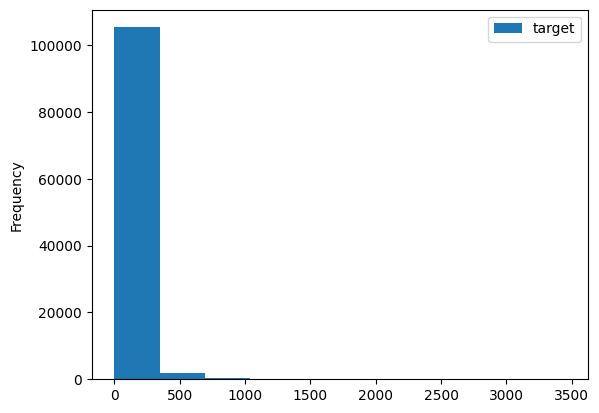

In [37]:
df[num_col].plot(kind='hist')


Text(0.5, 1.0, 'Distribution of target')

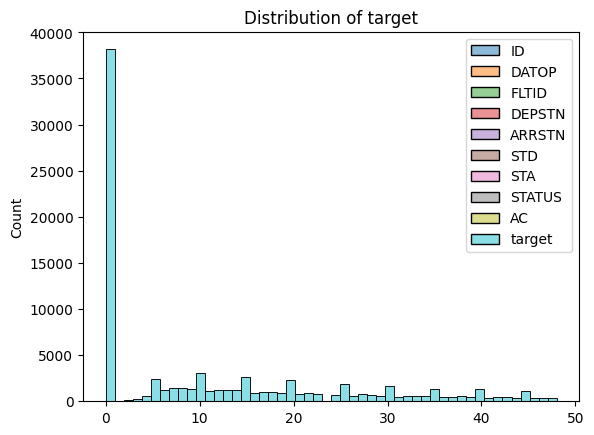

In [38]:
sns.histplot(df[df[num_col] < df[num_col].mean()], bins=50)
plt.title("Distribution of target")


In [39]:
# Since the distribution didn't follow normal distribution, we should apply log transformation

target = df["target"]
df["target"] = np.log1p(df["target"])


Text(0.5, 1.0, 'Distribution of target')

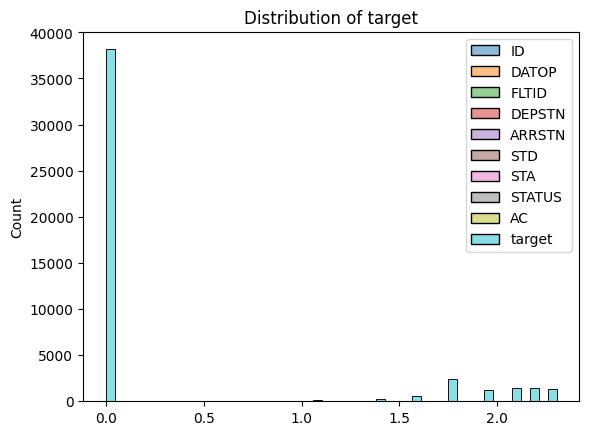

In [40]:
sns.histplot(df[df[num_col] < df[num_col].mean()], bins=50)
plt.title("Distribution of target")


In [41]:
result_df.head(2)


,STATUS_ATA,STATUS_DEL,STATUS_DEP,STATUS_RTR,STATUS_SCH,Date_Of_Flight_Year,Date_Of_Flight_Month,Date_Of_Flight_Day,Scheduled Time Departure_Hour,Scheduled Time Departure_Minutes,Scheduled Time Departure_Second,Scheduled Time Arrival_Hour,Scheduled Time Arrival_Minutes,Scheduled Time Arrival_Second,Scheduled Year Departure_Hour,Scheduled Year Departure_Minutes,Scheduled Year Departure_Second,Scheduled Year Arrival_Hour,Scheduled Year Arrival_Minutes,Scheduled Year Arrival_Second
0,1.0,0.0,0.0,0.0,0.0,2016,1,3,10,30,0,12,55,0,2016,1,3,2016,1,3
1,1.0,0.0,0.0,0.0,0.0,2016,1,13,15,5,0,16,55,0,2016,1,13,2016,1,13


In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(result_df, df["target"], test_size=0.2, random_state=42, shuffle=True)


In [43]:
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)


In [44]:
X_train = np.asarray(X_train)
X_test = np.asarray(X_test)


In [45]:

model = LinearRegression()
model.fit(X_train, y_train)
#Prediction
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
# RMSE FOR BOTH TRAINING AND TESTING
train_RMSE = np.sqrt(mean_squared_error(y_train, y_pred_train))
test_RMSE = np.sqrt(mean_squared_error(y_test, y_pred_test))

# R2_SCORE FOR BOTH TRAIN AND TEST SETS

test_score = model.score(X_test, y_test)
train_score = model.score(X_train, y_train)
print(f"RMSE for train is: {train_RMSE} and RMSE for test is: {test_RMSE} \n R2_score for train is: {train_score} \n R2_score for test is: {test_score}")


RMSE for train is: 1.7093835969362332 and RMSE for test is: 1.7043883938702507 
 R2_score for train is: 0.23408161434709296 
 R2_score for test is: 0.23097159191437622


In [47]:
X_train.shape


(86266, 20)

In [48]:
model.coef_


array([ 1.16085276e+10,  1.28384743e+09,  2.24780471e+09,  1.82924958e+09,
        1.12805327e+10, -1.32775163e+12, -1.06299466e+11,  2.31595840e+12,
        1.76255484e-01,  9.64233225e-02, -2.31401295e+08,  1.44984763e-01,
        2.52724364e-02,  1.04423072e+08,  1.32775163e+12,  1.06299466e+11,
       -2.31595840e+12,  3.73456597e-01,  2.29658484e-01,  6.92812726e-03])

In [49]:
importance_df = pd.DataFrame({"Features": result_df.columns, "Importance":model.coef_})
importance_df = importance_df.sort_values(by="Importance",ascending=False).head(10)
importance_df


,Features,Importance
7,Date_Of_Flight_Day,2.315958e+12
14,Scheduled Year Departure_Hour,1.327752e+12
15,Scheduled Year Departure_Minutes,1.062995e+11
0,STATUS_ATA,1.160853e+10
4,STATUS_SCH,1.128053e+10
2,STATUS_DEP,2.247805e+09
3,STATUS_RTR,1.829250e+09
1,STATUS_DEL,1.283847e+09
13,Scheduled Time Arrival_Second,1.044231e+08
17,Scheduled Year Arrival_Hour,3.734566e-01


In [48]:
import pickle
import os


In [49]:
def pickle_file(filename, file_dir):
    os.makedirs(file_dir, exist_ok=True)
    with open(filename, "wb") as file:
        pickle.dump(model, file)
        os.path.join(file_dir, filename)


In [50]:
pickle_file("linear_reg_model", "Model")


In [51]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV


In [52]:
X,y = result_df, df["target"]


In [53]:
X


,STATUS_ATA,STATUS_DEL,STATUS_DEP,STATUS_RTR,STATUS_SCH,Date_Of_Flight_Year,Date_Of_Flight_Month,Date_Of_Flight_Day,Scheduled Time Departure_Hour,Scheduled Time Departure_Minutes,Scheduled Time Departure_Second,Scheduled Time Arrival_Hour,Scheduled Time Arrival_Minutes,Scheduled Time Arrival_Second,Scheduled Year Departure_Hour,Scheduled Year Departure_Minutes,Scheduled Year Departure_Second,Scheduled Year Arrival_Hour,Scheduled Year Arrival_Minutes,Scheduled Year Arrival_Second
0,1.0,0.0,0.0,0.0,0.0,2016,1,3,10,30,0,12,55,0,2016,1,3,2016,1,3
1,1.0,0.0,0.0,0.0,0.0,2016,1,13,15,5,0,16,55,0,2016,1,13,2016,1,13
2,1.0,0.0,0.0,0.0,0.0,2016,1,16,4,10,0,6,45,0,2016,1,16,2016,1,16
3,1.0,0.0,0.0,0.0,0.0,2016,1,17,14,10,0,17,0,0,2016,1,17,2016,1,17
4,1.0,0.0,0.0,0.0,0.0,2016,1,17,14,30,0,15,50,0,2016,1,17,2016,1,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107828,0.0,0.0,0.0,0.0,1.0,2018,7,5,23,0,0,2,0,0,2018,7,5,2018,7,6
107829,0.0,0.0,0.0,0.0,1.0,2018,1,13,8,0,0,9,0,0,2018,1,13,2018,1,13
107830,0.0,0.0,0.0,0.0,1.0,2018,11,7,5,0,0,12,50,0,2018,11,7,2018,11,7
107831,1.0,0.0,0.0,0.0,0.0,2018,1,23,18,0,0,18,45,0,2018,1,23,2018,1,23


In [54]:
randomforest = RandomForestRegressor(random_state=42)

param_grid = {
    'max_depth': [10, 20, 30, 40, 50, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(randomforest,param_grid=param_grid, cv=5, scoring="neg_mean_squared_error", verbose=2)

grid_search.fit(X,y)


Fitting 5 folds for each of 54 candidates, totalling 270 fits


[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2; total time=  33.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2; total time=  22.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2; total time=  20.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2; total time=  21.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2; total time=  21.9s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5; total time=  21.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5; total time=  21.8s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5; total time=  22.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5; total time=  21.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5; total time=  21.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10; total time=  21.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10; total time=  21.6s
[C

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [10, 20, 30, 40, 50, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error', verbose=2)

In [55]:
grid_search.best_estimator_


RandomForestRegressor(max_depth=20, min_samples_leaf=4, min_samples_split=10,
                      random_state=42)

### Let's train with the above hyperparameters

In [58]:
def train_model(X_train, X_test, y_train, y_test):
    try:
        randomforesttrainer = RandomForestRegressor(max_depth=20, min_samples_leaf=4, min_samples_split=10, random_state=42)
        model = randomforesttrainer.fit(X_train, y_train)
        # train_R_Score = randomforesttrainer.score(X_train, y_train)
        # test_R_Score = randomforesttrainer.score(X_test, y_test)
        return model
    except Exception as e:
        return str(e)



In [64]:
from sklearn.metrics import mean_squared_error
def evaluate_model():
    try:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        model =  train_model(X_train, X_test, y_train, y_test)
        train_R_score = model.score(X_train, y_train)
        test_R_score = model.score(X_test, y_test)
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        train_RMSE = np.sqrt(mean_squared_error(y_train, y_train_pred))
        test_RMSE = np.sqrt(mean_squared_error(y_test, y_test_pred))
        return f"""
                The model score on train set is {train_R_score} \n
                The model score on test set is {test_R_score} \n
                RMSE score for train set is {np.round(train_RMSE, 2)} \n
                RMSE score for test set is {np.round(test_RMSE, 2)} \n
                """, model
    except Exception as e:
        return str(e)


In [65]:
str, model_variable = evaluate_model()


In [66]:
str


'\n                The model score on train set is 0.6129179422474125 \n\n                The model score on test set is 0.3780002385670549 \n\n                RMSE score for train set is 1.22 \n\n                RMSE score for test set is 1.53 \n\n                '